# LA  DISTANZA DEI SECONDARI NEL PROBLEMA DEI TRE CORPI PIANO

## INTRODUZIONE

Nello studio del problema dei tre corpi piano è utile studiare la distanza dei due corpi secondari poichè compare nella funzione di disturbo: 

$$ R = \frac{\mu'}{|\textbf{r'-r}|} - \mu'\frac{\textbf{r'⋅r}}{r'^{3}} $$

Analogamente nella funzione di disturbo $R'$ compare il termine $|\textbf{r-r'}|$.

-Image-
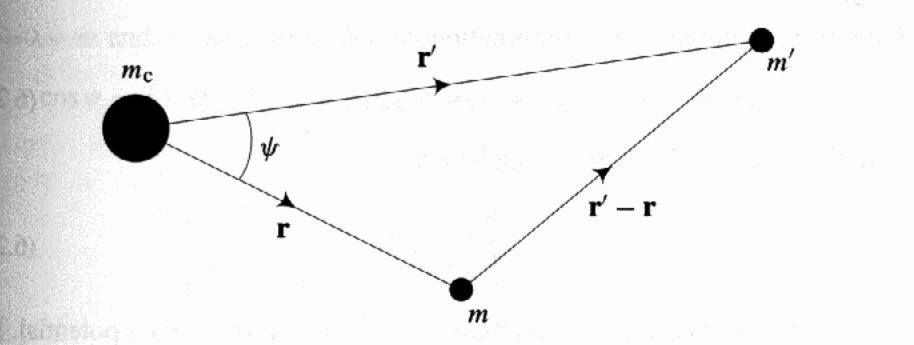

In [1]:
Import["3BPimage.png"]

L'obiettivo di questo lavoro sarà scrivere delle espansioni del quadrato della distanza $|\textbf{r'-r}|$ in modo da ottenere una forma del tipo:

$$ |\textbf{r'-r}|^{2} = \sum_{j=1}^{\infty} a^{j_{a}}a'^{j_{a'}}e^{j_{e}}e'^{j_{e'}}P_{j}(M,M',w,w') $$

dove: 

   - $a$ ed $a'$ sono i due semiassi maggiori;
   - $e$ ed $e'$ sono le due eccentricità;
   - $M$ ed $M'$ sono le anomalie medie;
   - $w$ e $w'$ sono le longitudini del periasse dell'orbita;
   - $P_{j}(M,M',w,w')$ è il coseno di una combinazione lineare degli elementi $M,M',w$ e $w'$.

Successivamente testeremo le nostre espansioni confrontandole con il quadrato della stessa distanza ottenuta mediante l'uso di alcune formule che spiegheremo in seguito.

## L'EQUAZIONE DI EULERO

Per prima cosa risolviamo l'equazione di Eulero:

$$ M = E - esin(E) $$ 

dove  $E$  è l'anomalia eccentrica, $M$ è l'anomalia media ed $e$ è l'eccentricità.

Anche se non lo useremo esplicitamente, questo risultato sarà utile per capire il metodo con cui otteniamo alcune espansioni descritte successivamente.

Per risolvere l'equazione di Eulero osserviamo che il secondo membro dell'equazione $E-M=esin(E)$ è una funzione dispari e periodica, pertanto possiamo considerare la sua espansione in Serie di Fourier:
$$ esin(E) = \sum_{s=1}^{\infty} b_{s}(e)sin(sM) \ $$

Come mostrato nelle note di Murray Dermott si osserva che $b_{s}(e)=\frac{2}{s}J_{s}(se)$ dove $J_{s}(se)$ è la $Funzione \ di \ Bessel$.

Si definisce la funzione di Bessel $J_{s}(x)$ per valori positivi di s come:

$$  J_{s}(x)=\frac{1}{s!}(\frac{x}{2})^{s}\sum_{\beta=0}^{\infty} (-1)^{\beta}\frac{(\frac{x}{2})^{2\beta}}{\beta!(s+1)(s+2)..(s+\beta)} $$

Osserviamo che $\forall s$ il primo termine della funzione $J_{s}(se)$ sarà di grado $s$ nelle eccentricità, mentre i termini successivi avranno sicuramente un grado più alto.

Se vogliamo quindi un'approssimazione fino al grando $n$ in eccentricità, possiamo troncare la serie all'n-esimo passo.

Questo ragionamento sarà valido allo stesso modo anche per alcune espansioni che effettueremo in seguito. In quei casi, però, dovremo tener conto che la funzione di Bessel sarà soggetta a delle operazioni.

Un'ulteriore osservazione da considerare è che la serie $ \sum_{s=1}^{\infty} b_{s}(e)sin(sM) \ $  converge rapidamente per piccoli valori di $e$, ma diverge per $e>0.6627434$

Definiamo la costante $degEcc$ come grado di approssimazione in eccentricità dell'espressione. Pertanto richiederemo un errore dell'ordine di $O(e^{degEcc+1})$

In [2]:
degEcc = 5;

Calcoliamo la serie sfruttando la funzione $BesselJ$ già implementanta in Mathematica: 

2
           e  Sin[2 M]    -Sin[M]   3 Sin[3 M]   3    -Sin[2 M]   Sin[4 M]   4
Sin[M] e + ----------- + (------- + ----------) e  + (--------- + --------) e  + 
                2            8          8                 6          3
 
     Sin[M]   27 Sin[3 M]   125 Sin[5 M]   5       6
>   (------ - ----------- + ------------) e  + O[e]
      192         128           384
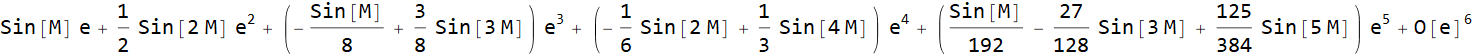

In [3]:
Sum[2/s*BesselJ[s, s*e]*Sin[s*M]+O[e]^(degEcc+1), {s, 1, degEcc}]

Di conseguenza otteniamo il valore dell'anomalia eccentrica:

2
               e  Sin[2 M]    -Sin[M]   3 Sin[3 M]   3    -Sin[2 M]   Sin[4 M]   4
M + Sin[M] e + ----------- + (------- + ----------) e  + (--------- + --------) e  + 
                    2            8          8                 6          3
 
     Sin[M]   27 Sin[3 M]   125 Sin[5 M]   5       6
>   (------ - ----------- + ------------) e  + O[e]
      192         128           384
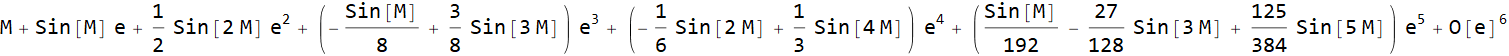

In [4]:
AnomEcc = M + %

## SERIE UTILI

Consideriamo le espansioni di ulteriori serie utili al nostro calcolo (prese dalle note di Murray Dermott) che si possono esprimere sempre in termini di funzioni di Bessel e la cui struttura è simile a quanto fatto per l'Equazione di Eulero.

I nuovi parametri che useremo sono:

   - $r$ raggio dell'orbita
   - $f$ anomalia vera
    
mentre gli altri sono stati introdotti precedentemente.  

Le serie sono:

$$ \frac{r}{a}=1+\frac{1}{2}e^{2}-2e\sum_{s=1}^{\infty} \frac{1}{s^{2}}\frac{d}{de}J_{s}(se)cos(sM) $$

$$ sin(f)= 2\sqrt{1-e^2}\sum_{s=1}^{\infty} \frac{1}{s}\frac{d}{de}J_{s}(se)sin(sM) $$ 

$$ cos(f) = -e + \frac{2(1-e^2)}{e}\sum_{s=1}^{\infty} J_{s}(se)cos(sM)$$

Per poterle usare definiamo tre funzioni: $expandRadius$, $expandSinTrueAnomaly$ ed $expandCosTrueAnomaly$. 

In input avranno:
    
- $e$ eccentricità
- $M$ anomalia media
- $degEcc$ grado di approssimazione in eccentricità dell'espressione.

Inoltre la funzione $expandRadius$ avrà in input la misura del semiasse maggiore $a$.
    
Come output le funzioni restituiranno le espansioni desiderate (nel caso di $expandRadius$ restituirà l'espansione del raggio e non di $\frac{r}{a}$).

Osserviamo che nelle espansioni di $\frac{r}{a}$ e di $sin(f)$ consideriamo la derivata della funzione di Bessel mentre per l'espansione del coseno dobbiamo tener conto di un fattore $e^{-1}$ che viene dal termine $\frac{2(1-e^2)}{e}$. In entrambi i casi il grado nelle eccentricità viene abbassato. Per questo, come indice massimo delle serie, prendiamo $degEcc+1$ invece che $degEcc$.

In [5]:
expandRadius[e_, M_, degEcc_, a_] := Module[{ris},

                ris= 1+e^2/2-2*e*Sum[1/(s^2)*D[BesselJ[s, s*e],e]*Cos[s*M], {s, 1, degEcc+1}] +O[e]^(degEcc+1);                
                ris = ExpandAll[ris*a];
                
                ris];

In [6]:
expandSinTrueAnomaly[e_, M_, degEcc_] := Module[{ris},

                ris=ExpandAll[ 2*Sqrt[1-e^2]*Sum[1/s*D[BesselJ[s, s*e],e]*Sin[s*M], {s, 1, degEcc+1}] +O[e]^(degEcc+1)];
                
                ris];

In [7]:
expandCosTrueAnomaly[e_, M_, degEcc_] := Module[{ris},

                ris=ExpandAll[ -e+2*(1-e^2)/e*Sum[BesselJ[s, s*e]*Cos[s*M], {s, 1, degEcc+1}] +O[e]^(degEcc+1)];
                
                ris];

Facciamo vedere che per $degEcc=4$ riotteniamo i risultati descritti nelle note di Murray Dermott.
In questo modo controlliamo che siano scritte bene.

In [8]:
degEcc=4;

1   Cos[2 M]   2    3 Cos[M]   3 Cos[3 M]   3
1 - e Cos[M] + (- - --------) e  + (-------- - ----------) e  + 
                2      2               8           8
 
     Cos[2 M]   Cos[4 M]   4       5
>   (-------- - --------) e  + O[e]
        3          3
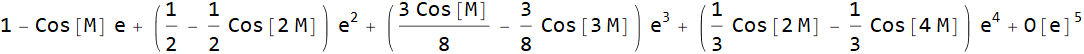

In [9]:
ExpandAll[expandRadius[e, M, degEcc, a]/a]

-9 Cos[M]   9 Cos[3 M]   2
Cos[M] + (-1 + Cos[2 M]) e + (--------- + ----------) e  + 
                                  8           8
 
     -4 Cos[2 M]   4 Cos[4 M]   3    25 Cos[M]   225 Cos[3 M]   625 Cos[5 M]   4       5
>   (----------- + ----------) e  + (--------- - ------------ + ------------) e  + O[e]
          3            3                192          128            384
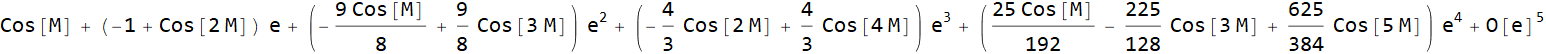

In [10]:
expandCosTrueAnomaly[e, M, degEcc]

-7 Sin[M]   9 Sin[3 M]   2    -7 Sin[2 M]   4 Sin[4 M]   3
Sin[M] + Sin[2 M] e + (--------- + ----------) e  + (----------- + ----------) e  + 
                           8           8                  6            3
 
     17 Sin[M]   207 Sin[3 M]   625 Sin[5 M]   4       5
>   (--------- - ------------ + ------------) e  + O[e]
        192          128            384
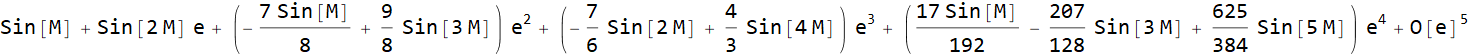

In [11]:
expandSinTrueAnomaly[e, M, degEcc]

## COSTRUZIONE DELL'ESPANSIONE

Fissiamo innanzitutto il grado di approssimazione in eccentricità richiesto.

In [12]:
degEcc=6;

Per il teorema del coseno vale che:

$$|\textbf{r'-r}|^{2} = r^{2}+r'^{2}-2rr'cos(\psi)$$

dove $\psi$ è l'angolo mostrato in figura ad inizio pagina.

Quello che faremo sarà quindi trovare delle espansioni per i raggi $r$ ed $r'$ e per $cos(\psi)$ ed usare la formula appena descritta per trovare il quadrato della distanza.

Per quanto riguarda queste espansioni, è sufficiente calcolarle fino al grado in eccentricità $degEcc$. Infatti, come si vede nella formula, sono oggetto di operazioni che aumentano o al limite lasciano invariato il grado.

L'angolo $\psi$, nel caso del problema dei tre corpi piano, rappresenta la differenza tra le longitudini vere $\theta_{1}$ e $\theta_{2}$ dei corpi $m$ ed $m'$.

Potendo ottenere la longitudine vera $\theta$ come differenza tra l'anomalia vera $f$ e la longitudine del periasse dell'orbita $w$, possiamo scrivere:

In [13]:
psi = (f2+w2)-(f1+w1);

Il coseno dell'angolo diventa: 

Cos[f1] Cos[f2] Cos[w1] Cos[w2] + Cos[w1] Cos[w2] Sin[f1] Sin[f2] - 
 
>   Cos[f2] Cos[w2] Sin[f1] Sin[w1] + Cos[f1] Cos[w2] Sin[f2] Sin[w1] + 
 
>   Cos[f2] Cos[w1] Sin[f1] Sin[w2] - Cos[f1] Cos[w1] Sin[f2] Sin[w2] + 
 
>   Cos[f1] Cos[f2] Sin[w1] Sin[w2] + Sin[f1] Sin[f2] Sin[w1] Sin[w2]
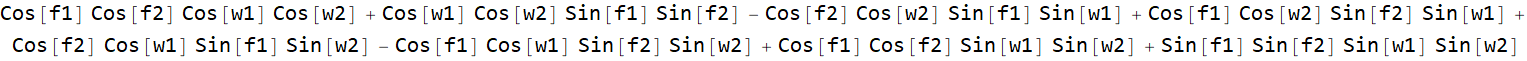

In [14]:
cosPsi = TrigExpand[Cos[psi]]

Avendo scritto le espansioni di coseno e seno dell'anomalia vera, le sostituiamo nell'equazione appena riportata.

Con la funzione $Normal$ eliminiamo dal testo gli "O-grande" usati nelle approssimazioni, con $Simplify$ poniamo l'espressione in una forma più semplice.

Osserviamo che nel caso $degEcc=2$ ottengo il risultato presente sulle note di Murray Dermott)

In [15]:
cosPsi = Simplify[ cosPsi/. {Cos[f1]->Normal[expandCosTrueAnomaly[e1, M1, degEcc]], 
Cos[f2]->Normal[expandCosTrueAnomaly[e2, M2, degEcc]], 
Sin[f1]->Normal[expandSinTrueAnomaly[e1,M1, degEcc]], 
Sin[f2]->Normal[expandSinTrueAnomaly[e2,M2, degEcc]]} ];

Abbiamo espresso così $cos(\psi)$ in funzione dell'eccentricità, della longitudine media e della longitudine del periasse.

Facciamo lo stesso per quanto riguarda i due raggi, in cui avremo in più anche la dipendenza dai semiassi maggiori $a_1$ e $a_2$.

In [16]:
r1 = Normal[ expandRadius[e1, M1, degEcc, a1] ];
r2 = Normal[ expandRadius[e2, M2, degEcc, a2] ];

Possiamo allora scrivere il quadrato della distanza dei due pianeti secondari come:

In [18]:
distQuad = r1^2+r2^2-2*r1*r2*cosPsi;

Estraiamo solo i termini di grado complessivo $degEcc$ nelle eccentricità:

In [19]:
distEspanQuadFormula = FromCoefficientRules[Select[CoefficientRules[distQuad, {e1, e2}], Total@#[[1]] <= degEcc &], {e1, e2}] ;

Tramite il seguente comando, possiamo visualizzare che effettivamente l'espansione è della forma $\sum_{j=1}^{\infty} a^{j_{a}}a'^{j_{a'}}e^{j_{e}}e'^{j_{e'}}P_{j}(M,M',w,w')$:

2   2       2   2     2                2     4
  2     2   3 a1  e1    3 a2  e2    a1  e1 (192 - 24 e1  + e1 ) Cos[M1]
a1  + a2  + --------- + --------- - ----------------------------------- - 
                2           2                       96
 
      2   2           2     4                2   3                 2   5
    a1  e1  (24 - 8 e1  + e1 ) Cos[2 M1]   a1  e1  Cos[3 M1]   9 a1  e1  Cos[3 M1]
>   ------------------------------------ - ----------------- + ------------------- - 
                     48                            4                   64
 
      2   4                 2   6                  2   5
    a1  e1  Cos[4 M1]   2 a1  e1  Cos[4 M1]   25 a1  e1  Cos[5 M1]
>   ----------------- + ------------------- - -------------------- - 
            6                   15                    192
 
        2   6                                  2   3             2   5
    9 a1  e1  Cos[6 M1]       2              a2  e2  Cos[M2]   a2  e2  Cos[M2]
>   ------------------- - 2 a2  e2 Cos[M2] + --------------- - --------------- - 
            80                                      4                96
 
      2   2               2   4               2   6               2   3
    a2  e2  Cos[2 M2]   a2  e2  Cos[2 M2]   a2  e2  Cos[2 M2]   a2  e2  Cos[3 M2]
>   ----------------- + ----------------- - ----------------- - ----------------- + 
            2                   6                  48                   4
 
        2   5               2   4                 2   6
    9 a2  e2  Cos[3 M2]   a2  e2  Cos[4 M2]   2 a2  e2  Cos[4 M2]
>   ------------------- - ----------------- + ------------------- - 
            64                    6                   15
 
         2   5                 2   6
    25 a2  e2  Cos[5 M2]   9 a2  e2  Cos[6 M2]   9 a1 a2 e1 e2 Cos[w1 - w2]
>   -------------------- - ------------------- - -------------------------- + 
            192                    80                        2
 
                                             2
                                   3 a1 a2 e1  e2 Cos[M1 + w1 - w2]
>   3 a1 a2 e2 Cos[M1 + w1 - w2] - -------------------------------- - 
                                                  2
 
              4
    3 a1 a2 e1  e2 Cos[M1 + w1 - w2]   3 a1 a2 e1 e2 Cos[2 M1 + w1 - w2]
>   -------------------------------- + --------------------------------- - 
                   64                                  2
 
              3                                    5
    9 a1 a2 e1  e2 Cos[2 M1 + w1 - w2]   5 a1 a2 e1  e2 Cos[2 M1 + w1 - w2]
>   ---------------------------------- + ---------------------------------- + 
                    8                                    32
 
              2                                    4
    9 a1 a2 e1  e2 Cos[3 M1 + w1 - w2]   9 a1 a2 e1  e2 Cos[3 M1 + w1 - w2]
>   ---------------------------------- - ---------------------------------- + 
                    8                                    8
 
                                                 5
            3                          5 a1 a2 e1  e2 Cos[4 M1 + w1 - w2]
>   a1 a2 e1  e2 Cos[4 M1 + w1 - w2] - ---------------------------------- + 
                                                       4
 
                4                                     5
    125 a1 a2 e1  e2 Cos[5 M1 + w1 - w2]   81 a1 a2 e1  e2 Cos[6 M1 + w1 - w2]
>   ------------------------------------ + ----------------------------------- - 
                    128                                    80
 
                  6                                       5
    16807 a1 a2 e2  Cos[M1 - 7 M2 + w1 - w2]   27 a1 a2 e2  Cos[M1 - 6 M2 + w1 - w2]
>   ---------------------------------------- - ------------------------------------- - 
                     23040                                      40
 
                  5
    27 a1 a2 e1 e2  Cos[2 M1 - 6 M2 + w1 - w2]
>   ------------------------------------------ - 
                        80
 
                4
    125 a1 a2 e2  Cos[M1 - 5 M2 + w1 -
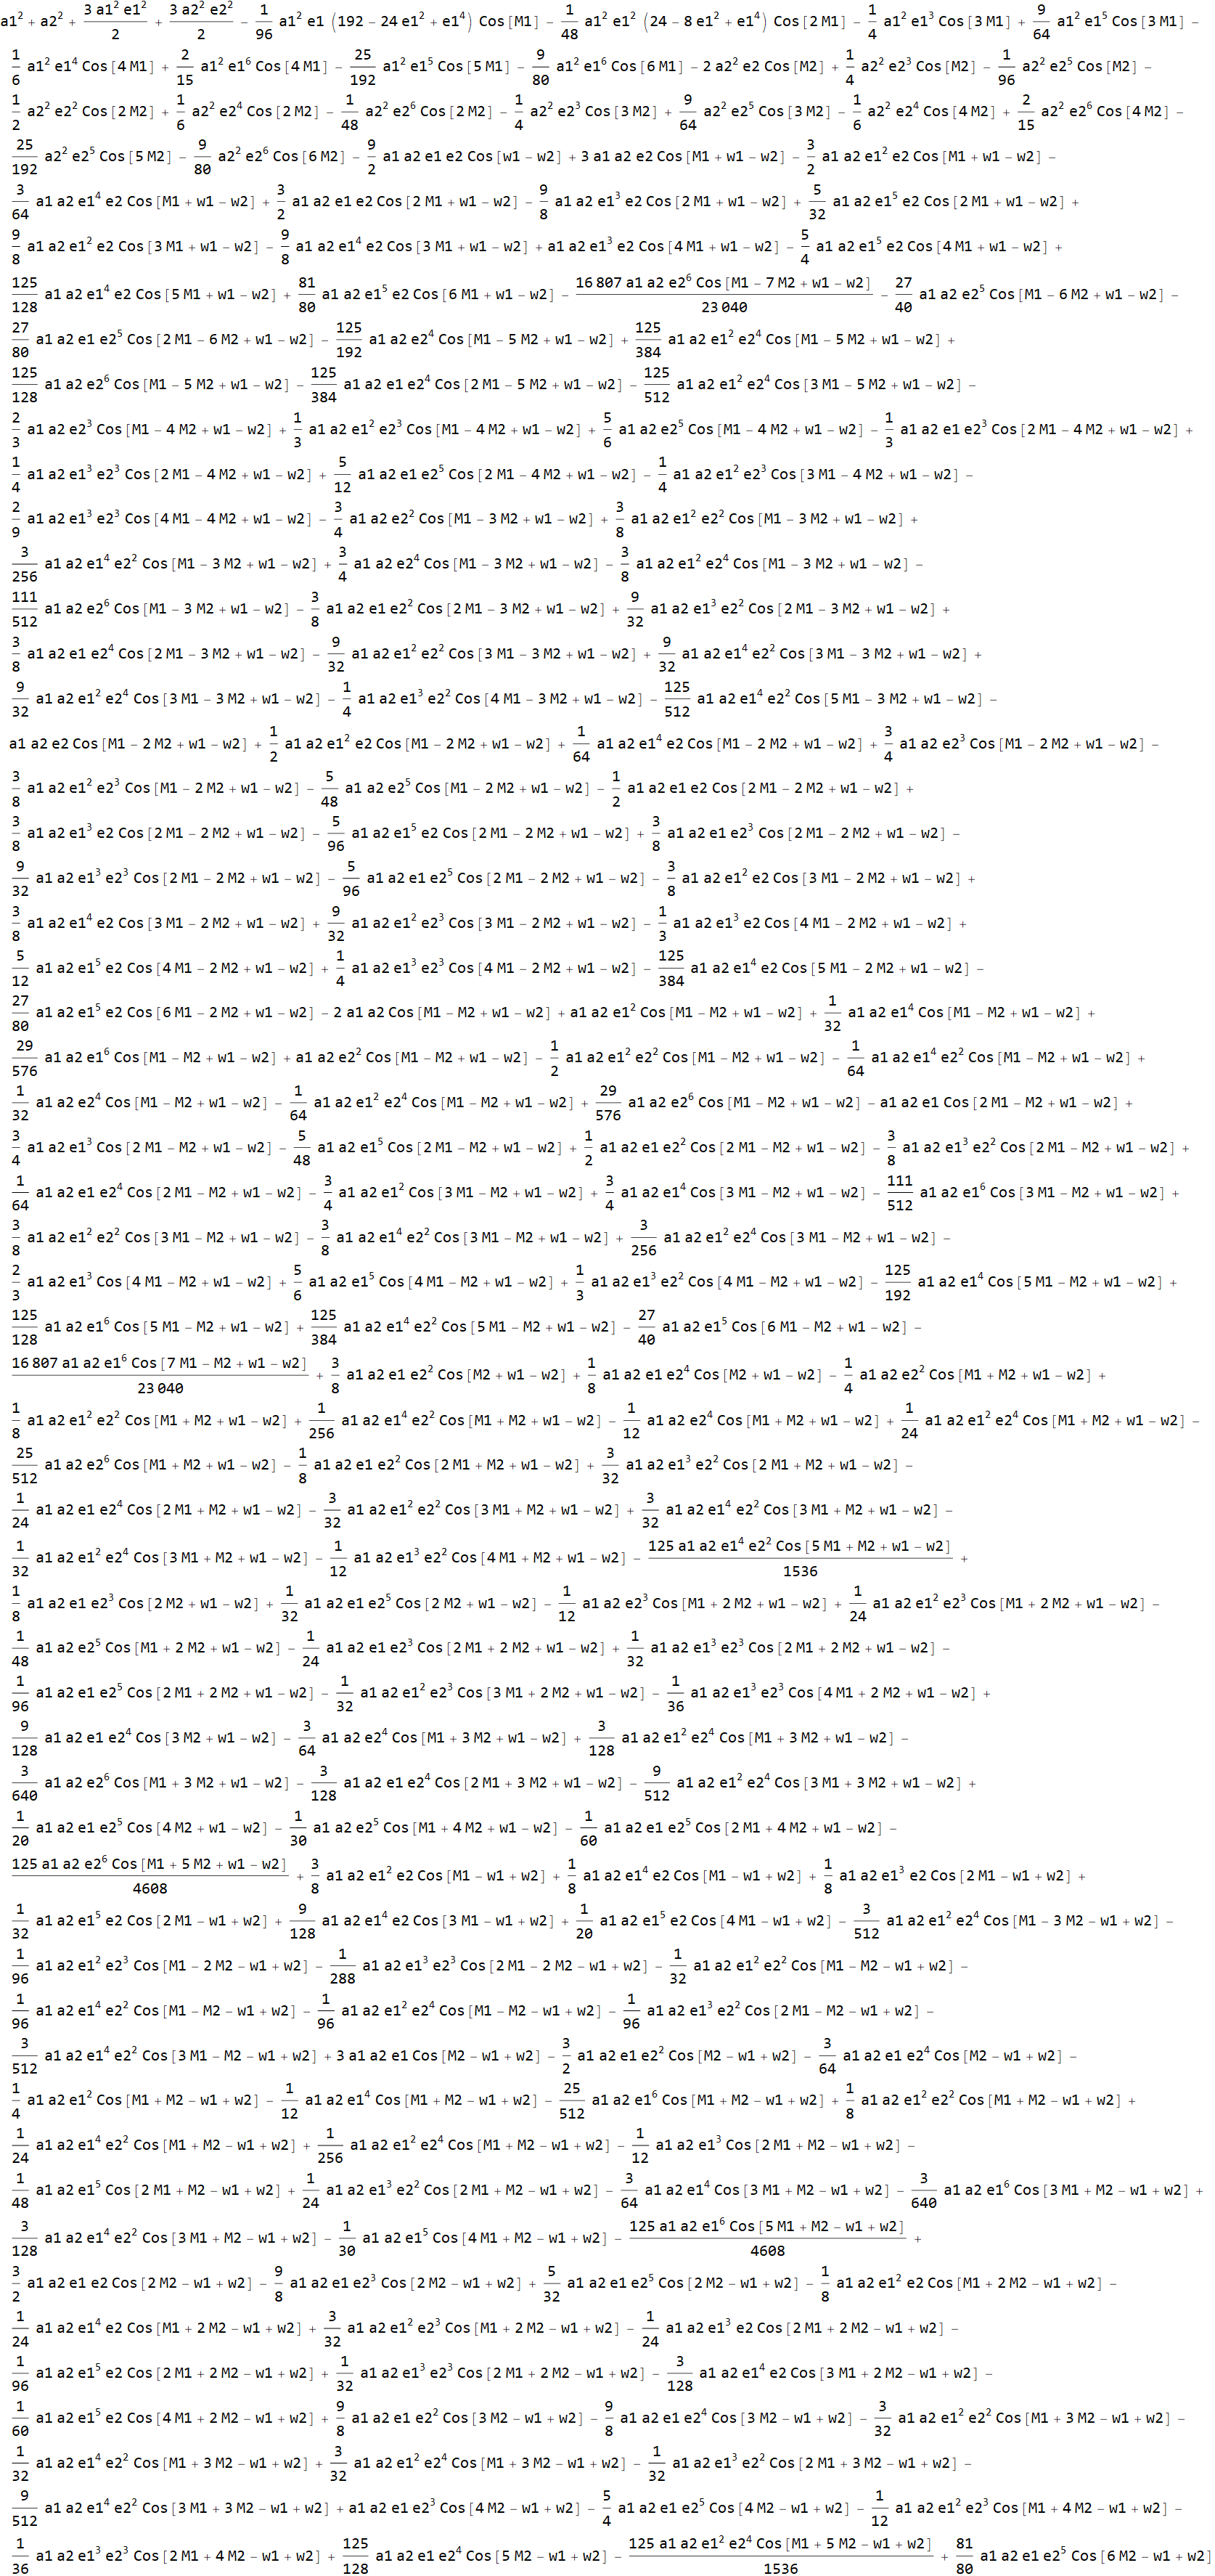

In [20]:
Simplify[Expand[distEspanQuadFormula]]

## FORMULA PER LA DISTANZA

Costruiamo adesso delle formule per calcolare il quadrato della distanza mediante l'utilizzo di alcune funzioni già implementate in Mathematica per il calcolo numerico.

La prima funzione $coordinatePlanet$ prende in input i parametri orbitali $M, e, a$ e $w$ di un singolo pianeta e restituisce in output le coordinate ${x,y}$ del pianeta nel piano.

Verrà dapprima risolta l'equazione di Eulero $ M = E - esin(E) $, tramite il metodo $Nsolve$, e successivamente verrano calcolate le coordinate $(x,y)$, tramite le seguenti formule:

   - $r=a(1-ecos(E))$
   
   - $tan(\frac{f}{2})=\sqrt{\frac{1+e}{1-e}}tan(\frac{E}{2})$ (che inverto per trovare l'anomalia vera)
   
   - $x = r cos(f + w)$ 
   
   - $y = r sin(f + w)$

In [21]:
coordinatePlanet[M_, e_, a_, w_] := Module[{anEc, radius, tanAnVera, anVera, x, y},

                anEc = anEc /.NSolve[M == anEc - e*Sin[anEc], anEc, Reals][[1]];
                
                radius = a*(1-e*Cos[anEc]);
                
                tanAnVera = tanAnVera /. Solve[tanAnVera==Sqrt[(1+e)/(1-e)]*Tan[anEc/2], tanAnVera ][[1]];
                anVera = 2*ArcTan[tanAnVera];
                
                x = radius*Cos[anVera+w];
                y = radius*Sin[anVera+w];
                
                {x, y} ];

Nella funzione $distRealQuadFunc$ prendiamo in input i parametri orbitali di due pianeti e, utilizzando le coordinate fornite dalla funzione $coordinatePlanet$ precedentemente descritta, calcoliamo il quadrato della loro distanza.

In [22]:
distRealQuadFunc[MG_, eG_, aG_, wG_, MS_, eS_, aS_, wS_] := Module[{xG, yG, xS, yS, distQuad},

                {xG,yG} = coordinatePlanet[MG, eG, aG, wG];                
                {xS,yS} = coordinatePlanet[MS, eS, aS, wS];                
                distQuad = (xG-xS)^2+(yG-yS)^2;
                
                
                distQuad];

## TEST DELLE ESPANSIONI

In quest'ultima parte eseguiremo un test delle espansioni create precedentemente. 

L'idea è di studiare l'andamento dell'errore relativo massimo che commettiamo nel calcolare il quadrato della distanza tramite le espansioni al variare dell'eccentricità.

Scorreremo i seguenti valori dell'eccentricità: $0.0125, 0.025, 0.05, 0.1, 0.2, 0.4$, cioè li raddoppieremo di volta in volta. L'errore che commettiamo nel calcolo della distanza tramite le espansioni è dell'ordine di $O^(e^{degEcc+1})$. Quello che vogliamo verificare è che conseguentemente l'errore relativo massimo cresce di un fattore $2^{degEcc+1}$.

Procederemo in questo modo:

Dopo aver fissato i valori dei semiassi maggiori $a_1$ e $a_2$ (nel nostro caso sono stati presi quelli di Giove e Saturno in unità astronomiche) e i valori per l'eccentricità, sono stati fatti 4 cicli for per creare dei valori random per gli angoli $M_1, M_2, w_1$ e $w_2$ e quindi simulare varie posizioni dei due pianeti in diversi istanti di tempo.

All'interno dei 4 cicli for ne è stato creato un altro che scorre i diversi valori dell'eccentricità in modo da confrontare i due metodi per calcolare le distanze nei diversi casi, ma mantenendo gli stessi valori dei parametri orbitali. 

Calcoliamo la differenza tra la distanza mediante le espansioni create e la distanza mediante le formule descritte salvando tutto in una lista.

Successivamente calcoliamo l'errore massimo relativo stampando e plottando l'andamento.

In [23]:
aG = 5.203;
aS = 9.582;

valEcc = {0.0125, 0.025, 0.05, 0.1, 0.2, 0.4};

listError = {};

For[i = 0, i < 4, i++, 

    MG = RandomReal[{0,2*Pi}];

    For[j = 0, j < 4, j++,

        MS = RandomReal[{0,2*Pi}];

        For[h = 0, h < 4, h++,

            wG = RandomReal[{0,2*Pi}];

            For[k = 0, k < 4, k++,

                wS = RandomReal[{0,2*Pi}];
                
                For[s = 1, s <= Length[valEcc], s++,
                    
    
                    eG=valEcc[[s]];
                    eS=valEcc[[s]];
                    
                    distRealQuad = distRealQuadFunc[MG, eG, aG, wG, MS, eS, aS, wS]; 
                
                    distEspanQuad = distEspanQuadFormula /. {M1->MG, M2->MS, w1->wG, w2->wS, e1->eG, e2->eS, a1->aG, a2->aS};               
                
                    listError = Append[listError, {Abs[distRealQuad - distEspanQuad],  distRealQuad, distEspanQuad, s}];
                    
                    ]
                

                ]

            ]

        ]


    ]

In [28]:
errRelMaxList = {};
ratioErrList = {};

For[s = 1, s <= Length[valEcc], s++,

    lista = {};

        For[i=1, i<=Length[listError], i++,

            If[ listError[[All,4]][[i]] == s,
    
                lista = Append[lista, listError[[i]]];
    
                ]
    
            ];

    indexMax = Position[ lista[[All,1]], Max[lista[[All,1]]] ][[1,1]];
    errRelMax = lista[[indexMax,1]]/lista[[indexMax,2]];
    
    errRelMaxList = Append[errRelMaxList, errRelMax];
    
    If[s!=1, 

        ratioErrList = Append[ratioErrList, errRelMaxList[[s]]/errRelMaxList[[s-1]] ];
    
        ]

    ]

In [31]:
errRelMaxList

-13            -11            -9            -7
{2.56914 10   , 3.17499 10   , 3.79846 10  , 4.43296 10  , 0.0000443139, 0.00401228}

In [32]:
ratioErrList

{123.582, 119.637, 116.704, 99.9647, 90.5422}

-Graphics-
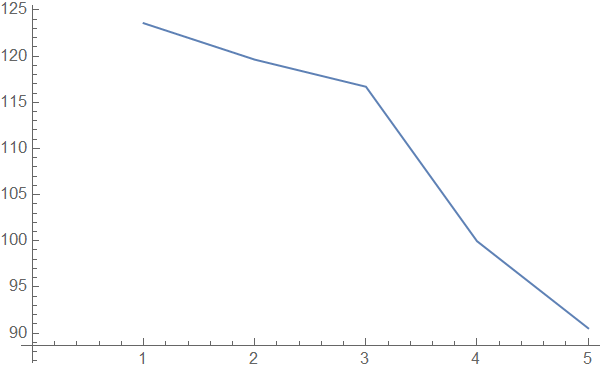

In [33]:
ListLinePlot[ratioErrList]

## CONCLUSIONI

L'errore relativo massimo al variare dell'eccentricità cresce effettivamente di un fattore che è circa $2^{degEcc+1}$ per i primi valori dell'eccentricità, che sono i più piccoli ($0.0125, 0.025, 0.05, 0.1$).
Invece, per valori più grandi delle eccentricità ($0.2$ e $0.4$), il fattore con cui cresce l'errore cambia. Questo risultato era prevedibile per il fatto che le espansioni sono consistenti per valori di eccentricità che tendono a 0.